In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch
from astropy.io import fits

import sunpy.coordinates  # NOQA
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

import torch

#for visualisation
import ipympl

Tutorial to download AIA images can be found there: https://docs.sunpy.org/en/stable/generated/gallery/acquiring_data/downloading_cutouts.html


## Usefull function 

### Load data

In [4]:
def load_data():
    data=pd.read_csv("./data/Jet_clusters_3.0_2.0_paperID.csv", sep=",")
    data.columns=data.columns.str.strip()
    data=data.drop(columns="velocity")

    return data

### Load image from the given data 

In [15]:
def get_image(data):
    
    data=data.reset_index()
    dates=data["date"]
    
    for i,date in enumerate(dates):
        
        start_time = Time(date, scale='utc', format='isot') #“CCYY-MM-DDThh:mm:ss[.sss. . . ]”, Coordinated Universal Time (UTC), 

        bottom_x=data["basepoint_X_longitude"][i]  # I am not sure this is right
        bottom_y=data["basepoint_Y_latitude"][i]   # same

        duration=data["duration"][i]

        bottom_left = SkyCoord(bottom_x*u.arcsec, bottom_y*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
        top_right = SkyCoord((bottom_x+300)*u.arcsec, (bottom_y+300)*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")

        jsoc_email = "adrien.joliat@epfl.ch"

        cutout = a.jsoc.Cutout(bottom_left=bottom_left, top_right=top_right, tracking=True)

        query = Fido.search(
            a.Time(start_time , start_time + duration*u.min), #duration is in min
            a.Wavelength(304*u.angstrom),
            a.Sample(12*u.s), #one image /12 s --> 5images per min
            a.jsoc.Series.aia_lev1_euv_12s,
            a.jsoc.Notify(jsoc_email),
            a.jsoc.Segment.image,
            cutout,
        )
        files = Fido.fetch(query)
        files.sort()
    return files

### Taking array from the file


In [16]:
def array_file(file): #for the moment only designed for one file
    with fits.open(file[0]) as f:
        array=f[1].data
        image_array=np.array(array)
    return image_array

### Plots images (Need improvements !)

In [17]:
def plot(files):
    %matplotlib ipympl
    sequence = sunpy.map.Map(files, sequence=True)

    fig = plt.figure()
    ax = fig.add_subplot(projection=sequence.maps[0])
    ani = sequence.plot(axes=ax, norm=ImageNormalize(vmin=0, vmax=5e3, stretch=SqrtStretch()))

## Code exemples

Export request pending. [id=JSOC_20231113_1725, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231113_1725, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231113_1725, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231113_1725, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231113_1725, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231113_1725, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231113_1725, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231113_1725, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231113_1725, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231113_1725, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231113_1725, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231113_1725, status=1]
Waiting for 5 seconds...
219 

Files Downloaded:   0%|          | 0/219 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-01-20T091550Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091602Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091614Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091626Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091638Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091650Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091702Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091714Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091726Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091738Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091750Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091802Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091814Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091826Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091838Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091850Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091902Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091914Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091926Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091938Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091950Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092002Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092014Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092026Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092050Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092102Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092114Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092126Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092138Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092150Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092202Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092214Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092226Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092238Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092250Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092302Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092314Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092326Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092338Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092350Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092402Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092414Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092426Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092438Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092450Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092502Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092514Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092526Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092550Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092602Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092614Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092626Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092638Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092650Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092702Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092714Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092726Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092750Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092802Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092814Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092826Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092838Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092850Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092902Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092914Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092926Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092938Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T092950Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093002Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093014Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093026Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093050Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093102Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093114Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093126Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093138Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093150Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093202Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093214Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093226Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093238Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093250Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093302Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093314Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093326Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093338Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093350Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093402Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093414Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093426Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093438Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093450Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093502Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093514Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093526Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093550Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093602Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093614Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093626Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093638Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093650Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093702Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093714Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093726Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093738Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093750Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093802Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093814Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093826Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093838Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093850Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093902Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093914Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093926Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T093950Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094002Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094014Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094026Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094050Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094102Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094114Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094126Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094138Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094150Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094202Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094214Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094226Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094238Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094250Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094302Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094314Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094326Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094338Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094350Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094402Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094414Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094426Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094438Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094450Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094502Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094514Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094526Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094550Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094602Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094614Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094626Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094638Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094650Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094702Z.304.image.fits:   0%|          | 0.00/204k [00:01<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094714Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094726Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094738Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094750Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094802Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094814Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094826Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094838Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094850Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094902Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094914Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094926Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094938Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T094950Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095002Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095014Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095026Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095050Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095102Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095114Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095126Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095150Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095202Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095214Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095226Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095238Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095250Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095302Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095314Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095326Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095338Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095350Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095402Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095414Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095426Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095438Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095450Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095502Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095514Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095526Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095550Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095602Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095614Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095626Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095638Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095650Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095702Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095714Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095726Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095738Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095750Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095802Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095814Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095826Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095838Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095850Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095902Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T095914Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

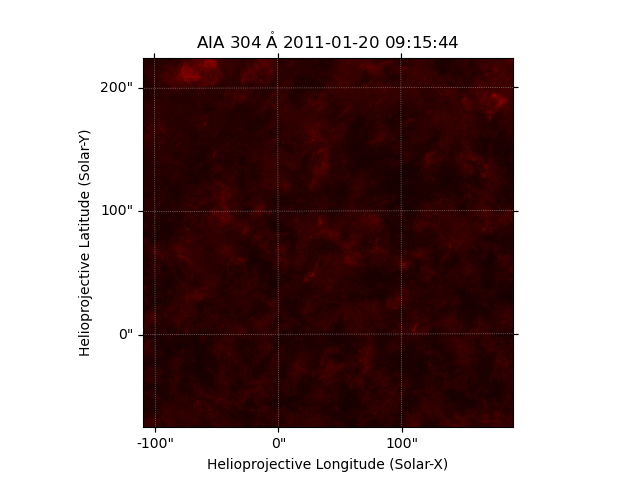

In [18]:
#Exemple with functions
data=load_data()
file=get_image(data[data.index==0]) #first line of the data
image_array=array_file(file)

plt.imshow(image_array, cmap="magma")  #just to show the image (need improvements)

%matplotlib ipympl
sequence = sunpy.map.Map(file, sequence=True)

fig = plt.figure()
ax = fig.add_subplot(projection=sequence.maps[0])
ani = sequence.plot(axes=ax, norm=ImageNormalize(vmin=0, vmax=5e3, stretch=SqrtStretch()))

In [67]:
"""
date: 2011-01-20T09:15:44.000000
basepoint_x: -226.577125	
basepoint_y: -956.964375
"""

start_time = Time('2011-01-20T09:15:44', scale='utc', format='isot') 
bottom_left = SkyCoord(-326*u.arcsec, -1057*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
top_right =SkyCoord(-126*u.arcsec, -857*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")

cutout = a.jsoc.Cutout(bottom_left, top_right=top_right, tracking=True)

#print(os.environ)
jsoc_email = "adrien.joliat@epfl.ch"

query = Fido.search(
    a.Time(start_time - 1*u.h, start_time + 1*u.h),
    a.Wavelength(304*u.angstrom),
    a.Sample(3*u.h),
    a.jsoc.Series.aia_lev1_euv_12s,
    a.jsoc.Notify(jsoc_email),
    a.jsoc.Segment.image,
    cutout,
)

print(query)

files = Fido.fetch(query)
files.sort()

Results from 1 Provider:

1 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2011-01-20T08:15:38Z  SDO/AIA    AIA_4      304    2105


Export request pending. [id=JSOC_20231111_992, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231111_992, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_992, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_992, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_992, status=1]
Waiting for 5 seconds...
1 URLs found for download. Full request totalling 1MB


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-01-20T081538Z.304.image.fits:   0%|          | 0.00/104k [00:00<?, ?B/s]

Results from 1 Provider:

3 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2011-01-20T08:15:38Z  SDO/AIA    AIA_4      304    2105
2011-01-20T09:15:38Z  SDO/AIA    AIA_4      304    2105
2011-01-20T10:15:38Z  SDO/AIA    AIA_4      304    2106


Export request pending. [id=JSOC_20231111_1117, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231111_1117, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_1117, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_1117, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_1117, status=1]
Waiting for 5 seconds...
3 URLs found for download. Full request totalling 28MB


Files Downloaded:   0%|          | 0/3 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-01-20T081546Z.304.image_lev1.fits:   0%|          | 0.00/9.71M [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091546Z.304.image_lev1.fits:   0%|          | 0.00/9.73M [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T101546Z.304.image_lev1.fits:   0%|          | 0.00/9.80M [00:00<?, ?B/s]

c:\Users\Adrien\anaconda3\envs\envADA\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


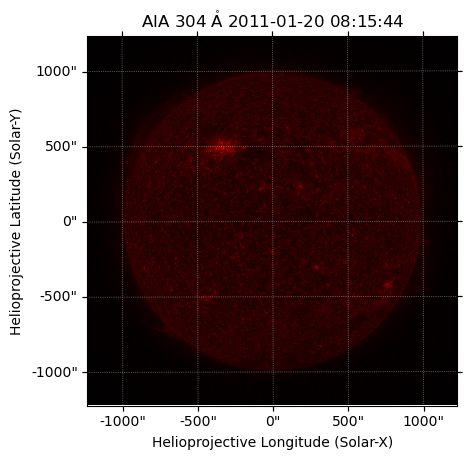

In [70]:
start_time = Time('2011-01-20T09:15:44.000000', scale='utc', format='isot')
bottom_left = SkyCoord(-1000*u.arcsec, -1000*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
#top_right = SkyCoord(-500*u.arcsec, -500*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
#cutout = a.jsoc.Cutout(bottom_left, tracking=True)
jsoc_email = "adrien.joliat@epfl.ch"
query = Fido.search(
    a.Time(start_time - 1*u.h, start_time + 1*u.h),
    a.Wavelength(304*u.angstrom),
    a.Sample(1*u.h),
    a.jsoc.Series.aia_lev1_euv_12s,
    a.jsoc.Notify(jsoc_email),
    a.jsoc.Segment.image,
    #cutout,
)
print(query)
files = Fido.fetch(query)
files.sort()
plot(files)

SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 4
Detector:		 AIA
Measurement:		 304.0 Angstrom
Wavelength:		 304.0 Angstrom
Observation Date:	 2011-01-20 08:15:44
Exposure Time:		 2.902184 s
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.60016501 0.60016501] arcsec / pix
Reference Pixel:	 [2053.22998 2037.20996] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[-1,  0,  1, ...,  0, -1,  0],
       [-1,  1,  0, ...,  0,  0,  0],
       [ 0,  0, -1, ..., -1,  1,  2],
       ...,
       [ 1,  0,  1, ..., -2, -2,  1],
       [ 0,  0,  0, ...,  1, -1, -1],
       [ 0, -1,  1, ...,  1, -2,  1]], dtype=int16)


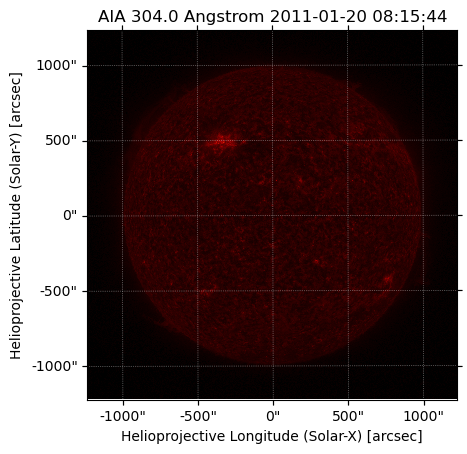

In [71]:
sequence = sunpy.map.Map(files, sequence=True)

fig = plt.figure()
ax = fig.add_subplot(projection=sequence.maps[0])
print(sequence.maps[0])
ani = sequence.plot(axes=ax, norm=ImageNormalize(vmin=0, vmax=5e3, stretch=SqrtStretch()))

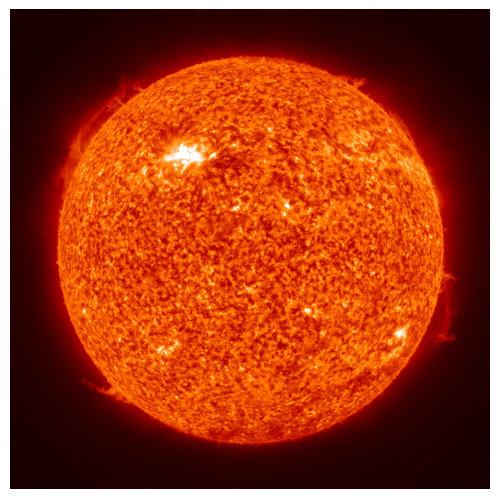

In [73]:
import numpy as np
smap = sunpy.map.Map(files[0])
figure = plt.figure(frameon=False)
ax = plt.axes([0, 0, 1, 1])
# Disable the axis
ax.set_axis_off()

# Plot the map.
# Since we are not interested in the exact map coordinates,
# we can simply use :meth:`~matplotlib.Axes.imshow`.
norm = smap.plot_settings['norm']
norm.vmin, norm.vmax = np.percentile(smap.data, [1, 99.9])
ax.imshow(smap.data,
          norm=norm,
          cmap=smap.plot_settings['cmap'],
          origin="lower")